## **Loading Dataset**

In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/Brain Tumor.csv')
df=dataset.iloc[:3000,1:-1]
df1=dataset.iloc[3000:,1:-1]
# df1.head()


## **Preprocessing**

In [3]:
print(dataset.isnull().sum())

Image                 0
class                 0
mean                  0
variance              0
standard Deviation    0
entropy               0
skewness              0
kurtosis              0
contrast              0
energy                0
asm                   0
homogeneity           0
dissimilarity         0
correlation           0
coarseness            0
dtype: int64


## **Installation**

In [4]:
pip install tensorflow_decision_forests --upgrade

## **Create RandomForestModel using Tensorflow**

In [5]:
import tensorflow
import tensorflow_decision_forests as tfdf
import pandas as pd

# Load a dataset in a Pandas dataframe.

# Convert the dataset into a TensorFlow dataset.
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df, label="class")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df1, label="class")

# Train a Random Forest model.
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

model.summary()
model.evaluate(test_ds)

# Export the model to a SavedModel.
model.save("project/model")

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2036: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


Use /tmp/tmp18qd3ysw as temporary training directory
Starting reading the dataset
1/3 [=========>....................] - ETA: 21s
Dataset read in 0:00:10.783551
Training model
Model trained in 0:00:00.857217
Compiling model
3/3 [==============================] - 12s 459ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (12):
	asm
	contrast
	correlation
	dissimilarity
	energy
	entropy
	homogeneity
	kurtosis
	mean
	skewness
	standard_Deviation
	variance

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.            "__LABEL"  5.892577 ################
    2. "standard_Deviation"  5.315816 ############
    3.           "variance"  5.283646 ############
    4.  

INFO:tensorflow:Assets written to: project/model/assets


INFO:tensorflow:Assets written to: project/model/assets


In [6]:
inspector = model.make_inspector()
print("Model type:", inspector.model_type())
print("Number of trees:", inspector.num_trees())
print("Objective:", inspector.objective())
print("Input features:", inspector.features())

Model type: RANDOM_FOREST
Number of trees: 300
Objective: Classification(label=__LABEL, class=None, num_classes=2)
Input features: ["asm" (1; #0), "contrast" (1; #1), "correlation" (1; #2), "dissimilarity" (1; #3), "energy" (1; #4), "entropy" (1; #5), "homogeneity" (1; #6), "kurtosis" (1; #7), "mean" (1; #8), "skewness" (1; #9), "standard_Deviation" (1; #10), "variance" (1; #11)]


**Accuracy**

In [7]:
inspector.evaluation()

Evaluation(num_examples=3000, accuracy=0.9893333333333333, loss=0.0766965343086049, rmse=None, ndcg=None, aucs=None)

**Extract tree**

In [8]:
inspector.extract_tree(tree_idx=0)

Tree(NonLeafNode(condition=(asm >= 0.038983412086963654; miss=True), pos_child=NonLeafNode(condition=(homogeneity >= 0.49726563692092896; miss=False), pos_child=NonLeafNode(condition=(skewness >= 6.3150763511657715; miss=False), pos_child=NonLeafNode(condition=(standard_Deviation >= 12.191182136535645; miss=True), pos_child=LeafNode(value=ProbabilityValue([0.42857142857142855, 0.5714285714285714],n=7.0), idx=21), neg_child=LeafNode(value=ProbabilityValue([1.0, 0.0],n=26.0), idx=20), value=ProbabilityValue([0.8787878787878788, 0.12121212121212122],n=33.0)), neg_child=NonLeafNode(condition=(entropy >= 0.11610861867666245; miss=False), pos_child=LeafNode(value=ProbabilityValue([1.0, 0.0],n=736.0), idx=19), neg_child=NonLeafNode(condition=(kurtosis >= 7.670258522033691; miss=True), pos_child=NonLeafNode(condition=(mean >= 14.007057189941406; miss=False), pos_child=LeafNode(value=ProbabilityValue([0.7142857142857143, 0.2857142857142857],n=7.0), idx=18), neg_child=NonLeafNode(condition=(kurt

**Plot the tree**

In [9]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=5)

**Testing for one instance**

Dissimilarity: 7.976389885937624e-05
correlation -3.988354006301598e-05
homogeneity 0.9999601180505703
energy 0.9999202376918375
contrast 7.976389885937624e-05
asm 0.9998404817457007
skewness 158.73562939581052
kurtosis 25195.000039684113

Evaluating....


/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2036: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00


{'loss': 0.0}

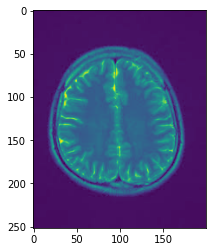

In [13]:
from skimage.feature import greycomatrix,greycoprops
from skimage import io 
from scipy.stats import skew,kurtosis
import matplotlib.pyplot as plt
import skimage.measure 
img=io.imread("/content/drive/MyDrive/non_tumour.jpg",as_gray=True) #give one image as input
plt.imshow(img)
img=img.astype("uint8")
glcm=greycomatrix(img,[1],[0,np.pi/4,np.pi/2,3*np.pi/4])

#get the features of an image
dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
correlation = greycoprops(glcm, 'correlation')[0, 0]
homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
contrast = greycoprops(glcm, 'contrast')[0, 0]
energy = greycoprops(glcm, 'energy')[0, 0]
asm = greycoprops(glcm, 'ASM')[0, 0]
   
entropy = skimage.measure.shannon_entropy(img)
mean=np.mean(img)
variance=np.var(img)
sd=np.std(img)
sk=skew(img.reshape(-1))
k=kurtosis(img.reshape(-1))

print("Dissimilarity:",dissimilarity)
print("correlation",correlation)
print("homogeneity",homogeneity)
print("energy",energy)
print("contrast",contrast)
print("asm",asm)
print("skewness",sk) 
print("kurtosis",k)

data=[{"Image":"Image1","class":0,"mean":mean,"variance":variance,"standard Deviation":sd,"entropy":entropy,
                                            "skewness":sk,"kurtosis":k,"contrast":contrast,"energy":energy,
                                            "asm":asm,"homogeneity":homogeneity,"dissimilarity":dissimilarity,"correlation":correlation}]
dfdata = pd.DataFrame(data)
test=tfdf.keras.pd_dataframe_to_tf_dataset(dfdata, label="class")
print()
print("Evaluating....")

evaluation = model.evaluate(test, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")
